In [11]:
import os
import tweepy as tw
import pandas as pd
from tqdm import tqdm, notebook

In [12]:
import ast

In [13]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
#nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [15]:
consumer_api_key = 'wp4RxdxZG4WkgzXF6Xpov6V1h'
consumer_api_secret = '1ZgztTq3ARzdH7IEdlDDWJNrywdTJXxOVZAvesIM8qPn5xfhpe'

In [16]:
auth = tw.OAuthHandler(consumer_api_key, consumer_api_secret)

In [17]:
api = tw.API(auth, wait_on_rate_limit = True)

In [18]:
search_words = "#BlackLivesMatter -filter:retweets"
date_since = "2019-01-01"

tweets= tw.Cursor(api.search_tweets, 
                 q= search_words,
                 lang= 'en',
                 since= date_since).items(1500)

In [19]:
tweets_copy =[]
for tweet in tqdm(tweets):
    tweets_copy.append(tweet)

0it [00:00, ?it/s]Unexpected parameter: since
1it [00:00,  1.52it/s]Unexpected parameter: since
16it [00:01, 13.58it/s]Unexpected parameter: since
31it [00:02, 16.36it/s]Unexpected parameter: since
46it [00:02, 19.77it/s]Unexpected parameter: since
61it [00:03, 19.33it/s]Unexpected parameter: since
75it [00:04, 16.52it/s]Unexpected parameter: since
90it [00:05, 18.53it/s]Unexpected parameter: since
105it [00:05, 22.13it/s]Unexpected parameter: since
116it [00:06, 22.97it/s]Unexpected parameter: since
125it [00:06, 23.39it/s]Unexpected parameter: since
140it [00:06, 26.75it/s]Unexpected parameter: since
154it [00:07, 28.35it/s]Unexpected parameter: since
169it [00:07, 26.00it/s]Unexpected parameter: since
176it [00:08, 19.60it/s]Unexpected parameter: since
190it [00:09, 21.43it/s]Unexpected parameter: since
204it [00:09, 24.57it/s]Unexpected parameter: since
219it [00:10, 27.66it/s]Unexpected parameter: since
234it [00:10, 30.25it/s]Unexpected parameter: since
249it [00:11, 28.09it/s]Un

In [21]:
print('Number of tweeets retrieved: ', len(tweets_copy))

Number of tweeets retrieved:  1500


In [22]:
tweets_copy[:5]

[Status(_api=<tweepy.api.API object at 0x00000192DEC64C70>, _json={'created_at': 'Sun Feb 06 12:44:43 +0000 2022', 'id': 1490305452936204294, 'id_str': '1490305452936204294', 'text': 'FAKE NEWS!!! DO NOT GET YOUR NEWS FROM HERE!!! it’s full of racist privileged bigots. \n@thenewtownbee… https://t.co/5BZefCAtOX', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'TheNewtownBee', 'name': 'The Newtown Bee', 'id': 20512928, 'id_str': '20512928', 'indices': [87, 101]}], 'urls': [{'url': 'https://t.co/5BZefCAtOX', 'expanded_url': 'https://twitter.com/i/web/status/1490305452936204294', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [103, 126]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_r

In [24]:
tweets_df= pd.DataFrame()
for tweet in tqdm(tweets_copy):
    hashtags= []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id= tweet.id, tweet_mode = 'extended').full_text
    
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({
        'id': tweet.id,
        'user_name' : tweet.user.name,
        'user_location': tweet.user.location,
        'user_description': tweet.user.description,
        'user_created': tweet.user.created_at,
        'user_followers': tweet.user.followers_count,
        'user_friends': tweet.user.friends_count,
        'user_favourites': tweet.user.favourites_count,
        'user_verified': tweet.user.verified,
        'date': tweet.created_at,
        'text': text,
        'hashtags': [hashtags if hashtags else None],
        'Source': tweet.source,
        'retweets': tweet.retweet_count,
        'favorites': tweet.favorite_count,
        'is_retweet': tweet.retweeted
        
    }))

100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [21:01<00:00,  1.19it/s]


In [25]:
tweets_df.tail()

id                    user_name       user_location  \
0  1489950086696259585         Something Ridiculous                       
0  1489950041842323456  Alexa Morgan-Digital artist                       
0  1489949980412547075        Onyx Paradigm⚡️👊🏿💪🏿⚡️  Global & Universal   
0  1489949942386937858         Say...the...names...       United States   
0  1489949693127843845                  Shananagins                       

                                                                                                                                                   user_description  \
0                                                                                                                I exaggerate a lot. please understand it’s a joke.   
0                      I am a very talented professional Digital artist. I have 6 year of experience and have worked as digital artist for many years. No free work   
0  Other races puts their own first. It becomes dangerous if Blk ppl do it. #StopAntiBlackHate #JusticeOrElse #EndWhiteSupremacy #m4all #BankBlack #BlackGrassRoots   
0                                                                                                                       Black lives murdered at the hands of police   
0                                                                                         NeverTrumper, curious and creative, conservatives be damned, cancer sucks   

               user_created  user_followers  user_friends  user_favourites  \
0 2009-01-18 16:14:14+00:00             131           261            15133   
0 2020-08-16 19:05:29+00:00             102           265               79   
0 2011-03-31 02:03:46+00:00            2708          3662            76708   
0 2020-06-05 17:44:28+00:00             204           328                0   
0 2020-07-30 12:15:25+00:00             122           360            15494   

   user_verified                      date  \
0          False 2022-02-05 13:12:37+00:00   
0          False 2022-02-05 13:12:26+00:00   
0          False 2022-02-05 13:12:11+00:00   
0          False 2022-02-05 13:12:02+00:00   
0          False 2022-02-05 13:11:03+00:00   

                                                                                                                                                                                                                     text  \
0                                                                                    The Anatomy of a Cover Up\n#amirlocke #breonnataylor #blacklivesmatter #noknockraid @ Minneapolis, Minnesota https://t.co/Y5PN4ZHPoe   
0                        Darkness cannot drive out darkness - only light can do that.\nSir Martin Luther King jr🖤🔥\n#BlackHistoryMonth #NFTs #BlackLivesMatter  #authorlife #twitch #digitalart #art #painting #Metaverse   
0                                                                              #BlackLivesMatter movement will go down in the flames of history as one of the biggest scams. Who profited off the deaths of Black people.   
0                                                                                                                                                                                        Yassin Mohamed #BlackLivesMatter   
0  SO...@GOP @GOPChairwoman, if January 6 was legitimate political discourse…you will be retracting ALL objections to the BLM protests quickly!  They did not even rise to the same level of discourse. #BlackLivesMatter   

                                                    hashtags  \
0  [amirlocke, breonnataylor, blacklivesmatter, noknockraid]   
0                                  [BlackHistoryMonth, NFTs]   
0                                         [BlackLivesMatter]   
0                                         [BlackLivesMatter]   
0                                                       None   

               Source  retweets  favorites  is_retweet  
0           Instagram         0          0       Fa

In [26]:
words = set(nltk.corpus.words.words())

In [27]:
def cleaner(tweet):
    tweet= re.sub("@[A-Za-z0-9] +", "", tweet)
    tweet= re.sub(r"(?:\@|http?\://|https?\://|www) \S+", "", tweet)
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ")
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet)
                    if w.lower() in words or not w.isalpha())
    return tweet
    

In [28]:
(tweets_df['clean_tweets'])= tweets_df['text'].apply(cleaner)

In [29]:
tweets_df.head()

id             user_name            user_location  \
0  1490305452936204294            Mariah Joy             New York, NY   
0  1490305082071605257         paula fortune              Houston, TX   
0  1490304779742072834  Say...the...names...            United States   
0  1490304504012627971         PotentEpitome  England, United Kingdom   
0  1490304379840307200            Mariah Joy             New York, NY   

                                                                                                                                          user_description  \
0                                                                                                                                    soft as a nail bed🦋⭐️   
0  Educator, librarian, creative manager of Fortune Entertainment, mother, grandmother , wife and now author of my first memoir.  A prisoner of God's Will   
0                                                                                                              Black lives murdered at the hands of police   
0    Articles + creative: Art. Home music production. Lyrics. Songwriting. Musicvids. NovelWriting. Photography. Inspiration. EQUALITY. Pro good people 💙🌈   
0                                                                                                                                    soft as a nail bed🦋⭐️   

               user_created  user_followers  user_friends  user_favourites  \
0 2009-08-11 22:03:07+00:00             397           106             4443   
0 2016-08-28 07:28:58+00:00              39           149             1090   
0 2020-06-05 17:44:28+00:00             204           328                0   
0 2021-10-13 09:10:46+00:00             155          1462             3123   
0 2009-08-11 22:03:07+00:00             397           106             4443   

   user_verified                      date  \
0          False 2022-02-06 12:44:43+00:00   
0          False 2022-02-06 12:43:14+00:00   
0          False 2022-02-06 12:42:02+00:00   
0          False 2022-02-06 12:40:56+00:00   
0          False 2022-02-06 12:40:27+00:00   

                                                                                                                                                                                                                                                                          text  \
0                                                                                                                           FAKE NEWS!!! DO NOT GET YOUR NEWS FROM HERE!!! it’s full of racist privileged bigots. \n@thenewtownbee \n#BLACKLIVESMATTER https://t.co/DKIx8EHOjf   
0                                                                      Amazing pictorial bio of this young man. Inspires children to never let your limitations stop you. #futurereadylibrarians #BlackHistoryMonth #blackexcellence #BlackLivesMatter https://t.co/VcYLs5S5Qz   
0                                                                                                                                                                                                                                             Kendrec McDade #BlackLivesMatter   
0  @AngryBlackLady speaks out against anti-blackness. Everyone I know is with her. It's all humans duty to educate racists. Racists, stop yourself. Get therapy. You are in the wrong\n #antiracism #noracists #inclusive #equality #BlackLivesMatter\nhttps://t.co/Me2PMIcMDs   
0                                                                                                                                              ASK NOT WHAT YOU CAN DO FOR YOUR COUNTRY, BUT WHAT IN THE FUCK HAS IT DONE FOR YOU?!\n\n#BLACKLIVESMATTER NOW AND FOREVERMORE!!   

             hashtags               Source  retweets  favorites  is_retweet  \
0                None   Twitter for iPhone         0          0       False   
0                None  Twitter for Android         0          0       False   
0  [

In [30]:
word_dict= {'pissed': -1, 'bemused': '1', 'cancel culture': '-1'}

In [31]:
sid= SentimentIntensityAnalyzer()
sid.lexicon.update(word_dict)

In [32]:
list_1= []
for i in tweets_df['clean_tweets']:
    list_1.append((sid.polarity_scores(str(i)))['compound'])

In [33]:
list_1[:10]

[-0.7964, 0.6896, 0.0, -0.765, 0.0, -0.7269, -0.4588, 0.3612, -0.7691, 0.6369]

In [34]:
tweets_df['sentiment'] = list_1

In [35]:
def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif (sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return (label)

In [36]:
tweets_df['sentiment_category'] = tweets_df['sentiment'].apply(sentiment_category)

In [37]:
tweets_df

id                                           user_name  \
0  1490305452936204294                                          Mariah Joy   
0  1490305082071605257                                       paula fortune   
0  1490304779742072834                                Say...the...names...   
0  1490304504012627971                                       PotentEpitome   
0  1490304379840307200                                          Mariah Joy   
0  1490304350953951233                                          Winter Sky   
0  1490304289197150212                                          Damisi Inc   
0  1490304107915231233                                              Bailey   
0  1490303811063357440                                  Jamaican Royal🇯🇲🇱🇷   
0  1490303417473974274                                              Bailey   
0  1490302786189205507       Alexa believes science & racism are both real   
0  1490302618995986432                                       kaderredblack   
0  1490302288128262144                                    Police Brutality   
0  1490301559401754627                                    Ada Okafor, Esq.   
0  1490301394095849475                                          Ravi Kikan   
0  1490301271005450242                                  Jamaican Royal🇯🇲🇱🇷   
0  1490301146686128128                                    Poet402/nabraska   
0  1490298478840500226                                            TVPlayer   
0  1490298164049584128                                           Veedus M.   
0  1490298116792152069                                          defund bot   
0  1490297763015311360                                    The Ugly Truth 📢   
0  1490296648244678658                                                 🌼 🌼   
0  1490296486021808131                        Happy Hussar 😊💂🏼‍♀️🇬🇧🏴󠁧󠁢󠁥󠁮󠁧󠁿   
0  1490296042822279173                             DatKingShh w'#MrMumbles   
0  1490295877755281413                                                 🌼 🌼   
0  1490295381388939265                                 Lanrick Bennett Jr.   
0  1490295339252953089                Rose's Husband, Alberta's Side Piece   
0  1490294888587423747                                    Draconius_Dracen   
0  1490294666314534913                                    Spectre Of Chaos   
0  1490294469203271682                                    The Ugly Truth 📢   
0  1490294405630201857                                   Invisible Battles   
0  1490294203678543874                                         OldMainBell   
0  1490293398019919872                           Carol Hafner for Congress   
0  1490293387219587074                                 Edward Fitzgerald ☘   
0  1490292482118230018                                         @1BlackLove   
0  1490289762233692161                   #BoycottGeorgia/Reparations NOW✊🏾   
0  1490289684802637826                                       V. A. L. U. E   
0  1490289681333993472                                Say...the...names...   
0  1490288153827155971                                   Jason W. Saunders   
0  1490287190659805184                                    Police Brutality   
0  1490285444390690816                                   Jason W. Saunders   
0  1490285053896794112                                             Aaliyah   
0  1490284899068219396                                    🇺🇸Whiskopalian🇮🇪   
0  1490284384875732997                                          BLM Pandel   
0  1490284364537675783                                       kaderredblack   
0  1490283923162681346                                    Dr. P.C. Justice   
0  1490283294654701570                                      A 👽 named SHAY   
0  1490283161611292674                                   Jason W. Saunders   
0  1490283154506194948                                              andrea   
0  1490283041918357504                                          defund bot   
0  1490281941626757121                    

In [38]:
tweets_df['sentiment_category'].value_counts()

negative    573
positive    475
neutral     452
Name: sentiment_category, dtype: int64

In [39]:


import matplotlib.pyplot as plt

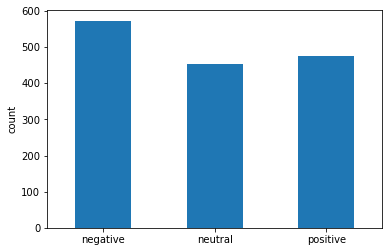

In [40]:
tweets_df['sentiment_category'].value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count')
plt.show()